# 음성

대화를 통해 AI(인공 지능) 시스템과 커뮤니케이션할 수 있기를 바라는 기대치가 점점 커지고 있으며, 음성 응답을 기대하는 경우도 많습니다.

![말하는 로봇](./images/speech.jpg)

*음성 인식*(구어를 해석하는 AI 시스템)과 *음성 합성*(구어 응답을 생성하는 AI 시스템)은 음성 지원 AI 솔루션의 핵심 구성 요소입니다.

## Cognitive Services 리소스 만들기

들리는 음성을 해석하고 구두로 응답하는 것이 가능한 소프트웨어를 만들기 위해 음성 언어를 텍스트로 혹은 그 반대로 변환하는 간단한 방법을 제공하는 **Speech** Cognitive Service를 사용할 수 있습니다.

아직 없다면 다음 단계를 따라 Azure 구독에서 **Cognitive Services** 리소스를 만듭니다.

> **참고**: 이미 Cognitive Services 리소스를 보유하고 있다면 Azure Portal에서 **빠른 시작** 페이지를 열고 키 및 엔드포인트를 아래의 셀로 복사하기만 하면 됩니다. 리소스가 없다면 아래의 단계를 따라 리소스를 만듭니다.

1. 다른 브라우저 탭에서 Azure Portal(https://portal.azure.com) 을 열고 Microsoft 계정으로 로그인합니다.
2. **&#65291;리소스 만들기** 단추를 클릭하고, *Cognitive Services*를 검색하고, 다음 설정을 사용하여 **Cognitive Services** 리소스를 만듭니다.
    - **구독**: *사용자의 Azure 구독*.
    - **리소스 그룹**: *고유한 이름의 새 리소스 그룹을 선택하거나 만듭니다*.
    - **지역**: *사용 가능한 지역을 선택합니다*.
    - **이름**: *고유한 이름을 입력합니다*.
    - **가격 책정 계층**: S0
    - **알림을 읽고 이해했음을 확인합니다**. 선택됨.
3. 배포가 완료될 때까지 기다립니다. 그런 다음에 Cognitive Services 리소스로 이동하고, **개요** 페이지에서 링크를 클릭하여 서비스의 키를 관리합니다. 클라이언트 애플리케이션에서 Cognitive Services 리소스에 연결하려면 키 및 위치가 필요합니다.

### Cognitive Services 리소스의 키 및 위치 가져오기

Cognitive Services 리소스를 사용하려면 클라이언트 애플리케이션에 인증 키 및 위치가 필요합니다.

1. Azure Portal에 있는 Cognitive Service 리소스의 **키 및 엔드포인트** 페이지에서 리소스의 **Key1**을 복사하고 아래 코드에 붙여 넣어 **YOUR_COG_KEY**를 대체합니다.
2. 리소스의 **위치**를 복사하고 아래 코드에 붙여 넣어 **YOUR_COG_LOCATION**를 대체합니다.
>**참고**: **키 및 엔드포인트** 페이지에 그대로 있으면서 이 페이지에서 **위치**를 복사하세요(예: _westus_). 위치 필드의 단어 사이에 공백을 추가해서는 _안 됩니다_. 
3. 셀 왼쪽에 있는 **셀 실행**(&#9655;) 단추를 클릭하여 아래의 코드를 실행합니다.

In [2]:
cog_key = '149b9a076c7d48dd98f306cec2e540c4'
cog_location = 'koreacentral'

print('Ready to use cognitive services in {} using key {}'.format(cog_location, cog_key))

Ready to use cognitive services in koreacentral using key 149b9a076c7d48dd98f306cec2e540c4


## 음성 인식

"불 켜" 또는 "불 꺼"와 같은 음성 명령을 수신하는 홈 자동화 시스템을 구축하려고 한다고 가정해 보세요. 애플리케이션은 오디오 기반 입력(사용자의 음성 명령)을 가져오고, 구문 분석할 수 있는 텍스트로 필사하여 해석할 수 있어야 합니다.

이제 일부 음성을 필사할 준비가 되었습니다. 입력값은 **마이크** 또는 **오디오 파일**에서 가져올 수 있습니다. 


### 오디오 파일을 통한 음성 인식

아래의 셀을 실행하여 Speech Recognition 서비스가 **오디오 파일**을 사용하는 것을 확인해 보세요. 


In [3]:
import os
from playsound import playsound
from azure.cognitiveservices.speech import SpeechConfig, SpeechRecognizer, AudioConfig

# Get spoken command from audio file
file_name = 'light-on.wav'
audio_file = os.path.join('data', 'speech', file_name)

# Configure speech recognizer
speech_config = SpeechConfig(cog_key, cog_location)
speech_config.speech_synthesis_voice_name = 'en-US-ChristopherNeural'
audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
speech_recognizer = SpeechRecognizer(speech_config, audio_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()
print(speech)

# Play the original audio file
playsound(audio_file)

# Show transcribed text from audio file
print(speech.text)

SpeechRecognitionResult(result_id=943f6ce265244e9c9b369c3530687b0c, text="Turn the light on.", reason=ResultReason.RecognizedSpeech)
Turn the light on.


## 음성 합성

지금까지 Speech 서비스를 사용하여 음성을 텍스트로 필사하는 방법을 살펴봤습니다. 반대로 하려면 어떻게 해야 할까요? 어떻게 텍스트를 음성으로 변환할 수 있을까요?

홈 자동화 시스템이 불을 켜라는 명령을 해석했다고 가정해 보겠습니다. 적절한 응답은 명령된 작업을 수행하는 것은 물론 명령을 구두로 확인하는 것입니다.

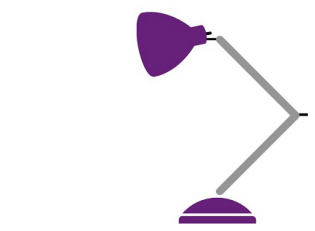

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from azure.cognitiveservices.speech import SpeechConfig, SpeechSynthesizer, AudioConfig
%matplotlib inline

# Get text to be spoken
response_text = 'Turning the light on.'

# Configure speech synthesis
speech_config = SpeechConfig(cog_key, cog_location)
speech_config.speech_synthesis_voice_name = 'en-US-ChristopherNeural'
speech_synthesizer = SpeechSynthesizer(speech_config)



# ------------------------------
# Get spoken command from audio file
file_name = 'light-off.wav'
audio_file = os.path.join('data', 'speech', file_name)

# Configure speech recognizer
audio_config = AudioConfig(filename=audio_file) # Use file instead of default (microphone)
speech_recognizer = SpeechRecognizer(speech_config, audio_config)

# Use a one-time, synchronous call to transcribe the speech
speech = speech_recognizer.recognize_once()

# Show trandcribed text from audio file
response_text = speech.text

# -------------------------------

# Transcribe text into speech
result = speech_synthesizer.speak_text(response_text)

# Display an appropriate image 
file_name = response_text.lower() + "jpg"
# 해당 파일은 이름이 대소문자가 섞여있기 때문에 lower은 텍스트를 전부 소문자로 변경
img = Image.open(os.path.join("data", "speech", file_name))
plt.axis('off')
plt. imshow(img)

**response_text** 변수를 *불 꺼.*(끝에 있는 마침표도 포함)로 변경하고 셀을 다시 실행하여 결과를 들어 보세요.

## 자세한 내용

이 노트북에서는 Speech Cognitive Service를 사용하는 매우 간단한 예를 살펴봤습니다. Speech 서비스 설명서에서 [음성을 텍스트로](https://docs.microsoft.com/azure/cognitive-services/speech-service/index-speech-to-text) 및 [텍스트를 음성으로](https://docs.microsoft.com/azure/cognitive-services/speech-service/index-text-to-speech)에 대해 자세히 알아볼 수 있습니다.